In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg 
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [12]:
df= pd.read_excel('PJMW_MW_Hourly.xlsx', index_col=0)
df

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077
2002-12-31 02:00:00,4939
2002-12-31 03:00:00,4885
2002-12-31 04:00:00,4857
2002-12-31 05:00:00,4930
...,...
2018-01-01 20:00:00,8401
2018-01-01 21:00:00,8373
2018-01-01 22:00:00,8238


In [13]:
x= df.values

print('shape of dataset \t', df.shape)
print('original dataset \n', df.head())
print('after extracting only megawatts: \n', x)

shape of dataset 	 (143206, 1)
original dataset 
                      PJMW_MW
Datetime                    
2002-12-31 01:00:00     5077
2002-12-31 02:00:00     4939
2002-12-31 03:00:00     4885
2002-12-31 04:00:00     4857
2002-12-31 05:00:00     4930
after extracting only megawatts: 
 [[5077]
 [4939]
 [4885]
 ...
 [8238]
 [7958]
 [7691]]


<AxesSubplot: xlabel='Datetime'>

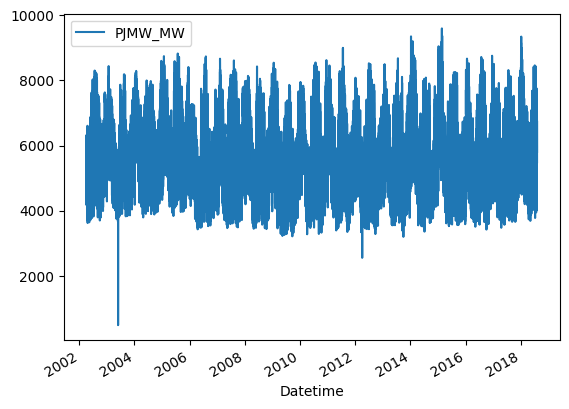

In [14]:
df.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

df_test= adfuller(df['PJMW_MW'], autolag='AIC')

print('1. ADF:', df_test[0])
print('2. P-Value:', df_test[1])
print('3. Number of lags:', df_test[2])
print('4. Num of observations used for ADF Regression and Critical Value Calculation:', df_test[3])
print('5. Critical Values:')
for key, val in df_test[4].items():
    print('\t', key, ":", val)

1. ADF: -19.53097878897811
2. P-Value: 0.0
3. Number of lags: 74
4. Num of observations used for ADF Regression and Critical Value Calculation: 143131
5. Critical Values:
	 1% : -3.4303956883364264
	 5% : -2.8615601935959596
	 10% : -2.5667807483328238


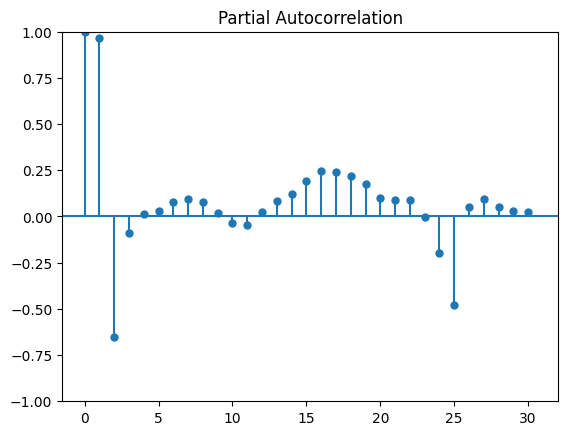

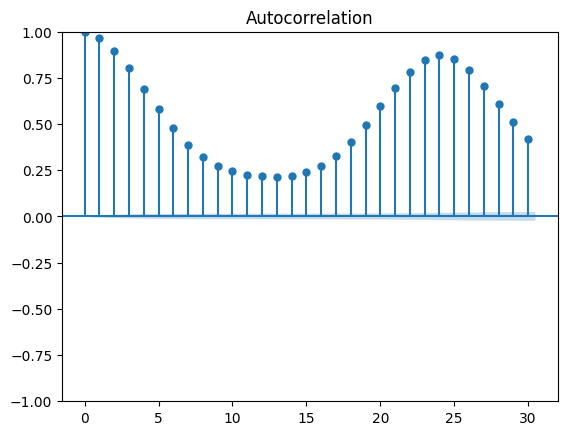

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pacf= plot_pacf(df['PJMW_MW'], lags= 30)
acf=plot_acf(df['PJMW_MW'], lags= 30)

# AR Model

In [17]:
train = df.loc[df.index < '01-01-2018']
test = df.loc[df.index >= '01-01-2018']

In [18]:
train

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077
2002-12-31 02:00:00,4939
2002-12-31 03:00:00,4885
2002-12-31 04:00:00,4857
2002-12-31 05:00:00,4930
...,...
2017-01-01 20:00:00,5690
2017-01-01 21:00:00,5668
2017-01-01 22:00:00,5543


In [19]:
test

,PJMW_MW
Datetime,
2018-01-01 00:00:00,7612
2018-08-02 01:00:00,5100
2018-08-02 02:00:00,4840
2018-08-02 03:00:00,4745
2018-08-02 04:00:00,4572
...,...
2018-01-01 20:00:00,8401
2018-01-01 21:00:00,8373
2018-01-01 22:00:00,8238


In [10]:
model= AutoReg(train, lags=3).fit()

In [29]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                PJMW_MW   No. Observations:               138070
Model:                     AutoReg(3)   Log Likelihood             -915996.105
Method:               Conditional MLE   S.D. of innovations            184.103
Date:                Mon, 03 Apr 2023   AIC                        1832002.210
Time:                        17:18:08   BIC                        1832051.388
Sample:                             3   HQIC                       1832016.921
                               138070                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        318.4255      3.008    105.871      0.000     312.531     324.320
PJMW_MW.L1     1.5442      0.003    575.936      0.000       1.539       1.549
PJMW_MW.L2    -0.5150      0.005   -108.466      0.0

In [30]:
len(train)

138070

In [31]:
len(test)

5136

In [32]:
len(df)

143206

In [33]:
len(x)

143206

In [34]:
pred_ar= model.predict(start= len(train), end= len(x)-1, dynamic=False)

In [35]:
len(pred_ar)

5136

In [36]:
len(test)

5136

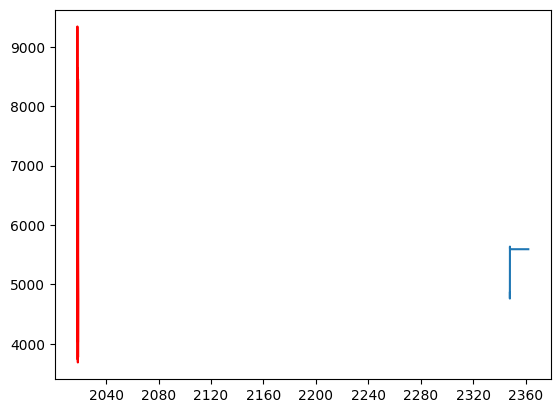

In [37]:
plt.plot(pred_ar)
plt.plot(test, color= 'red')

In [38]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [39]:
rmse_ar = np.sqrt(mean_squared_error(test, pred_ar))

In [40]:
rmse_ar

1047.4530881026967

In [41]:
pred_Future= model.predict(start= len(df)+1, end= len(df)+30, dynamic= False)
print('Then future prediction for the next 30 days')
print(pred_Future)
print('Number of predictions made: \t', len(pred_Future))

Then future prediction for the next 30 days
143207    5593.228709
143208    5593.228709
143209    5593.228709
143210    5593.228709
143211    5593.228709
143212    5593.228709
143213    5593.228709
143214    5593.228709
143215    5593.228709
143216    5593.228709
143217    5593.228709
143218    5593.228709
143219    5593.228709
143220    5593.228709
143221    5593.228709
143222    5593.228709
143223    5593.228709
143224    5593.228709
143225    5593.228709
143226    5593.228709
143227    5593.228709
143228    5593.228709
143229    5593.228709
143230    5593.228709
143231    5593.228709
143232    5593.228709
143233    5593.228709
143234    5593.228709
143235    5593.228709
143236    5593.228709
dtype: float64
Number of predictions made: 	 30


In [48]:
#create AR model by ARMA
model1= ARIMA(train, order=(10,0,0)).fit()

In [49]:
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                PJMW_MW   No. Observations:               138070
Model:                ARIMA(10, 0, 0)   Log Likelihood             -914332.989
Date:                Mon, 03 Apr 2023   AIC                        1828689.977
Time:                        17:26:48   BIC                        1828808.003
Sample:                             0   HQIC                       1828725.284
                             - 138070                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5593.2323     13.682    408.791      0.000    5566.415    5620.049
ar.L1          1.5270      0.001   1479.335      0.000       1.525       1.529
ar.L2         -0.4857      0.003   -180.124      0.0

In [51]:
pred_arima= model1.predict(start= len(train), end= len(x)-1, dynamic=False)

In [52]:
len(pred_arima)

5136

In [53]:
len(test)

5136

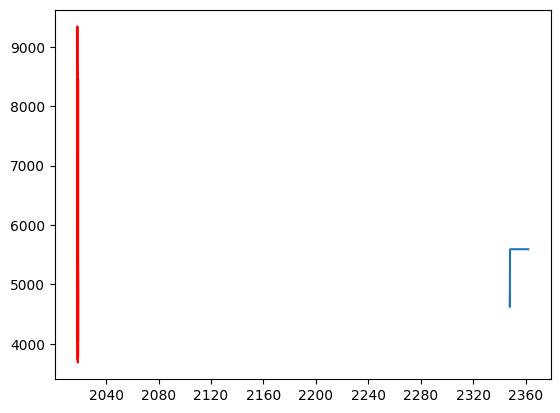

In [55]:
plt.plot(pred_arima)
plt.plot(test, color= 'red')

In [56]:
rmse_ar = np.sqrt(mean_squared_error(test, pred_arima))
rmse_ar

1047.8090930523322

# 3

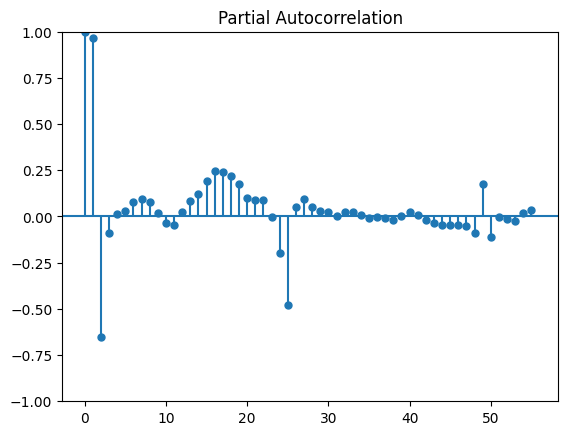

In [60]:
pacf= plot_pacf(df, lags=55)

In [143]:
ar3 = AutoReg(train, lags=1000).fit()

In [144]:
print(ar3.summary())

                            AutoReg Model Results                             
Dep. Variable:                PJMW_MW   No. Observations:               138070
Model:                  AutoReg(1000)   Log Likelihood             -842241.525
Method:               Conditional MLE   S.D. of innovations            112.806
Date:                Mon, 03 Apr 2023   AIC                        1686487.050
Time:                        22:41:46   BIC                        1696334.954
Sample:                          1000   HQIC                       1689433.913
                               138070                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.9739      3.436      8.433      0.000      22.240      35.708
PJMW_MW.L1        1.0928      0.003    404.589      0.000       1.088       1.098
PJMW_MW.L2       -0.0656      0.004    -

In [145]:
pred = ar3.predict(start=len(train), end=(len(df)-1), dynamic=False)
pred

138070    5018.781566
138071    4865.616968
138072    4785.003855
138073    4778.573682
138074    4838.478761
             ...     
143201    5912.936330
143202    5781.683798
143203    5604.287234
143204    5416.141779
143205    5261.830979
Length: 5136, dtype: float64

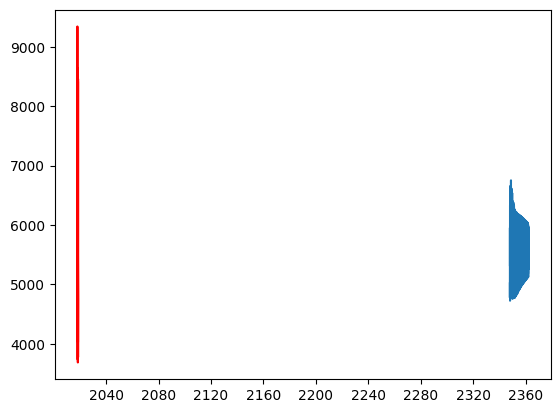

In [146]:
plt.plot(pred)
plt.plot(test, color='red')

In [147]:
rmse_ar3 = np.sqrt(mean_squared_error(test, pred))

In [148]:
rmse_ar3

977.176548922481

In [150]:
pred_Future= model.predict(start= len(df)+1, end= len(df)+30, dynamic= False)
print('Then future prediction for the next 30 days')
print(pred_Future)
print('Number of predictions made: \t', len(pred_Future))

Then future prediction for the next 30 days
143207    5593.228709
143208    5593.228709
143209    5593.228709
143210    5593.228709
143211    5593.228709
143212    5593.228709
143213    5593.228709
143214    5593.228709
143215    5593.228709
143216    5593.228709
dtype: float64
Number of predictions made: 	 10


### AR Model (Autoregressive (AR))

In [20]:
ar = AutoReg(train, lags=1000).fit()
pred_ar= ar.predict(start= len(train), end= len(train)+len(test)-1, dynamic=False)
rmse_ar = np.sqrt(mean_squared_error(test, pred_ar))
rmse_ar

977.176548922481